# Case Study on Beer Reviews
### Notebook by Sumit


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beer-review/train.csv


In [2]:
import matplotlib.pyplot
import seaborn as sns

## Loading the data

In [3]:
raw_data=pd.read_csv("../input/beer-review/train.csv")
raw_data.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [4]:
raw_data.shape

(37500, 19)

In [5]:
raw_data.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


## Data cleaning and Data preprocessing

In [6]:
raw_data.dtypes

index                  int64
beer/ABV             float64
beer/beerId            int64
beer/brewerId          int64
beer/name             object
beer/style            object
review/appearance    float64
review/aroma         float64
review/overall       float64
review/palate        float64
review/taste         float64
review/text           object
review/timeStruct     object
review/timeUnix        int64
user/ageInSeconds    float64
user/birthdayRaw      object
user/birthdayUnix    float64
user/gender           object
user/profileName      object
dtype: object

In [7]:
raw_data.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

User/birthdayRaw,user/birthdayUnix,user/gender have around 50-80 percent null data so it have to be removed but user/profileName is object type data and few data are unavialable so that can be replaced by the mode of it.

In [8]:
mode=raw_data["user/profileName"].mode()[0]
raw_data["user/profileName"].replace(np.nan,mode, inplace=True)

In [9]:
raw_data.drop(["user/ageInSeconds"], axis=1, inplace=True)
raw_data.drop(["user/birthdayRaw"], axis=1, inplace=True)
raw_data.drop(["user/birthdayUnix"], axis=1, inplace=True)
raw_data.drop(["user/gender"], axis=1, inplace=True)

In [10]:
raw_data.dropna(subset=["review/text"], axis=0, inplace=True)

In [11]:
raw_data.isnull().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/profileName     0
dtype: int64

We don't have any null data now we can proceed.

## EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac69c0f0d0>,
      dtype=object)

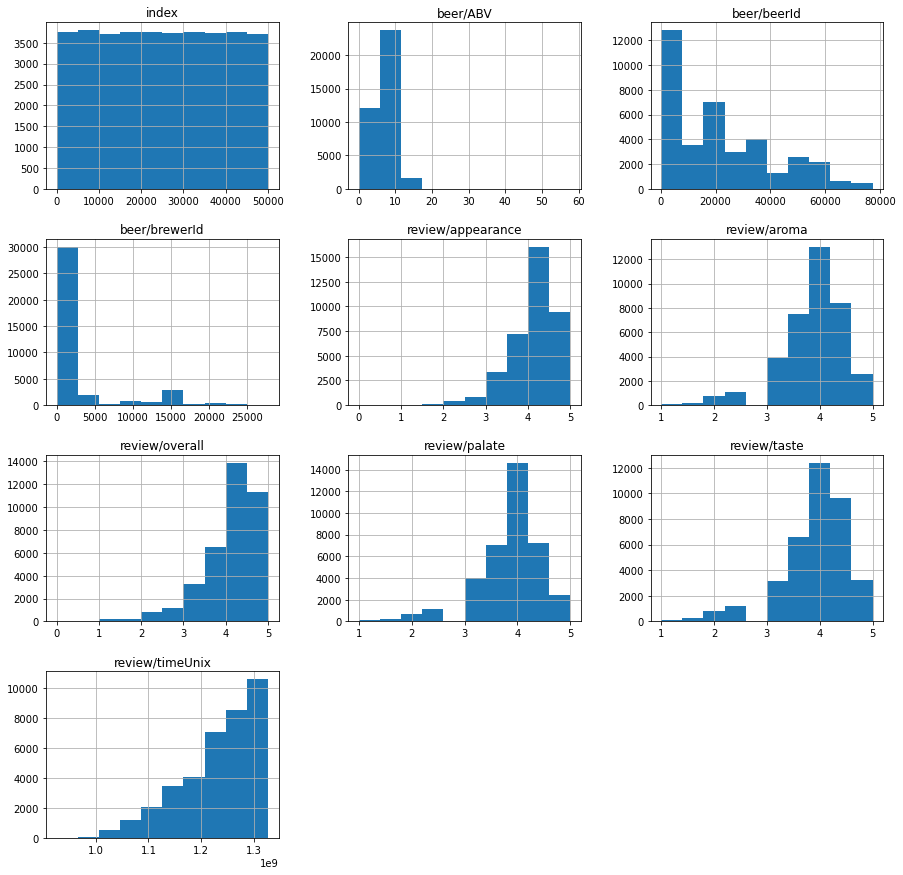

In [13]:
raw_data.hist(figsize=(15,15))

In [14]:
beer_abv_name=raw_data.loc[:,['beer/ABV','beer/name']]
beer_abv_name=beer_abv_name.groupby(['beer/name'])['beer/ABV'].mean()
beer_abv_name=pd.DataFrame(data=beer_abv_name).reset_index()
beer_abv_name

,beer/name,beer/ABV
0,"""The Wind Cried Mari..."" Scottish Heather Ale",4.4
1,'Pooya Porter,5.5
2,1 A.M. Ale,4.5
3,10 Blocks South,5.5
4,10 Year Clelebration Ale,6.5
...,...,...
1683,Zlatorog,4.5
1684,Zorg,8.0
1685,Âaibo,9.5
1686,Ãgte Fynsk Boghvedebryg,5.7


In [15]:
beer_abv_name=raw_data.loc[:,['beer/ABV','beer/style']]
beer_abv_name=beer_abv_name.groupby(['beer/style'])['beer/ABV'].mean()
beer_abv_name=pd.DataFrame(data=beer_abv_name).reset_index()
beer_abv_name

,beer/style,beer/ABV
0,Altbier,5.207398
1,American Adjunct Lager,4.912059
2,American Amber / Red Ale,5.651636
3,American Amber / Red Lager,5.204348
4,American Barleywine,11.565615
...,...,...
90,Vienna Lager,5.741379
91,Weizenbock,11.900000
92,Wheatwine,11.961224
93,Winter Warmer,7.064851


Let's explore the beer according to its name and style and find the relation between them

In [16]:
beer_name=raw_data.loc[:,['beer/name','beer/ABV','review/appearance','review/aroma','review/palate','review/taste','review/overall']]
beer_name=beer_name.groupby(['beer/name'])['beer/ABV','review/appearance','review/aroma','review/palate','review/taste','review/overall'].mean()
beer_name=pd.DataFrame(data=beer_name).reset_index()
beer_name

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,beer/name,beer/ABV,review/appearance,review/aroma,review/palate,review/taste,review/overall
0,"""The Wind Cried Mari..."" Scottish Heather Ale",4.4,3.875000,4.175000,3.925000,4.050000,3.950000
1,'Pooya Porter,5.5,3.000000,4.000000,3.500000,4.000000,4.000000
2,1 A.M. Ale,4.5,3.833333,3.666667,3.000000,2.666667,2.666667
3,10 Blocks South,5.5,3.500000,3.500000,3.500000,4.000000,3.500000
4,10 Year Clelebration Ale,6.5,4.000000,3.500000,4.000000,4.500000,4.000000
...,...,...,...,...,...,...,...
1683,Zlatorog,4.5,3.361111,3.000000,3.277778,3.138889,3.347222
1684,Zorg,8.0,2.000000,3.000000,1.500000,2.000000,1.750000
1685,Âaibo,9.5,2.939394,2.772727,2.772727,2.621212,2.651515
1686,Ãgte Fynsk Boghvedebryg,5.7,2.500000,2.500000,2.500000,3.000000,3.500000


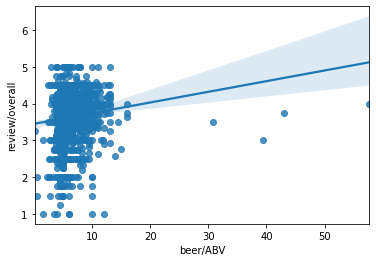

In [17]:
sns.regplot(x='beer/ABV', y='review/overall', data=beer_name)

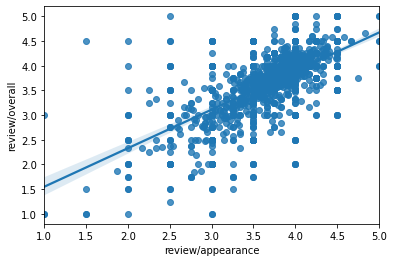

In [18]:
sns.regplot(x='review/appearance', y='review/overall', data=beer_name)

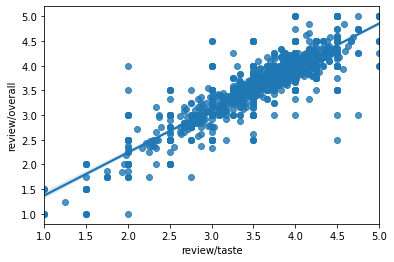

In [19]:
sns.regplot(x='review/taste', y='review/overall', data=beer_name)

In [20]:
beer_style=raw_data.loc[:,['beer/style','beer/ABV','review/appearance','review/aroma','review/palate','review/taste','review/overall']]
beer_style=beer_style.groupby(['beer/style'])['beer/ABV','review/appearance','review/aroma','review/palate','review/taste','review/overall'].mean()
beer_style=pd.DataFrame(data=beer_style).reset_index()
beer_style

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,beer/style,beer/ABV,review/appearance,review/aroma,review/palate,review/taste,review/overall
0,Altbier,5.207398,3.589431,3.398374,3.516260,3.459350,3.605691
1,American Adjunct Lager,4.912059,3.126471,2.794118,2.976471,2.979412,3.194118
2,American Amber / Red Ale,5.651636,3.642127,3.481595,3.552147,3.519427,3.595092
3,American Amber / Red Lager,5.204348,3.586957,3.282609,3.586957,3.630435,3.543478
4,American Barleywine,11.565615,4.008675,4.048107,4.042587,4.067823,3.888801
...,...,...,...,...,...,...,...
90,Vienna Lager,5.741379,3.568966,3.206897,3.517241,3.500000,3.568966
91,Weizenbock,11.900000,3.444444,3.444444,3.388889,3.388889,3.277778
92,Wheatwine,11.961224,3.899417,4.218659,4.104956,4.154519,3.827988
93,Winter Warmer,7.064851,3.730198,3.774752,3.569307,3.613861,3.519802


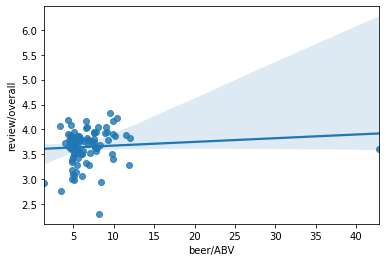

In [21]:
sns.regplot(x='beer/ABV', y='review/overall', data=beer_style)

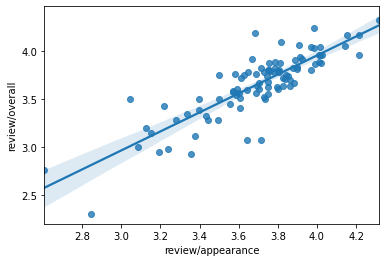

In [22]:
sns.regplot(x='review/appearance', y='review/overall', data=beer_style)

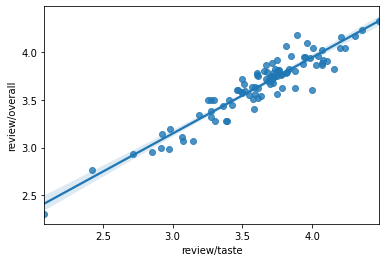

In [23]:
sns.regplot(x='review/taste', y='review/overall', data=beer_style)

We saw that the overall review highly depends upon taste and appearance

## Feature Engineering

In [26]:
raw_data['beer/name'].nunique()

1688

There are 1688 unique type of beer name but it is too much too handle.

In [27]:
raw_data['beer/name'].value_counts()

Founders Breakfast Stout                   1883
Founders KBS (Kentucky Breakfast Stout)    1439
Founders Centennial IPA                    1063
Founders Red's Rye PA                      1051
Founders Dirty Bastard                      983
                                           ... 
Quinn's Marathon Mild                         1
Black Betsy Imperial Black Belgian IPA        1
Two Trees IIPA                                1
REDD'S                                        1
SPA                                           1
Name: beer/name, Length: 1688, dtype: int64

We see there are lots of beer name that just appear once or a very few times that doesn't effect the data much so we can remove some.

In [28]:
counts = raw_data['beer/name'].value_counts()
dt = raw_data.loc[raw_data['beer/name'].isin(counts.index[counts > 50])]

In [29]:
dt['beer/name'].nunique()

116

Now it is enough

In [30]:
raw_data['beer/style'].nunique()

95

In [31]:
raw_data['user/profileName'].value_counts()

northyorksammy     146
BuckeyeNation      110
mikesgroove         92
ChainGangGuy        84
MasterSki           83
                  ... 
hylton44             1
jczn                 1
rudolphjacksonm      1
EsoxLucius           1
ilikebeer            1
Name: user/profileName, Length: 7439, dtype: int64

So there are some many users that review the wine so the data will not highly depend on the name of the user.

In [32]:
raw_data.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/profileName'],
      dtype='object')

In [33]:
raw_data.corr()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix
index,1.000000,-0.149404,-0.306030,-0.339680,0.054404,0.040445,0.054569,0.039867,0.047276,-0.155120
beer/ABV,-0.149404,1.000000,0.330642,0.007352,0.288139,0.386160,0.196780,0.350536,0.353878,0.248833
beer/beerId,-0.306030,0.330642,1.000000,0.523601,-0.007314,0.045340,-0.022009,0.027813,0.019296,0.424560
beer/brewerId,-0.339680,0.007352,0.523601,1.000000,-0.078216,-0.081744,-0.084998,-0.066484,-0.100628,0.206523
review/appearance,0.054404,0.288139,-0.007314,-0.078216,1.000000,0.537925,0.498628,0.555750,0.531560,0.067477
review/aroma,0.040445,0.386160,0.045340,-0.081744,0.537925,1.000000,0.616031,0.608895,0.711766,0.109101
review/overall,0.054569,0.196780,-0.022009,-0.084998,0.498628,0.616031,1.000000,0.697172,0.785174,0.065322
review/palate,0.039867,0.350536,0.027813,-0.066484,0.555750,0.608895,0.697172,1.000000,0.732036,0.094467
review/taste,0.047276,0.353878,0.019296,-0.100628,0.531560,0.711766,0.785174,0.732036,1.000000,0.092045
review/timeUnix,-0.155120,0.248833,0.424560,0.206523,0.067477,0.109101,0.065322,0.094467,0.092045,1.000000


Looking at the reletion between review/overall and others it seems like the overall review higly depends upom appearance,aroma, overall,palate,taste and some on ABV but doesn't depends much on other factors.

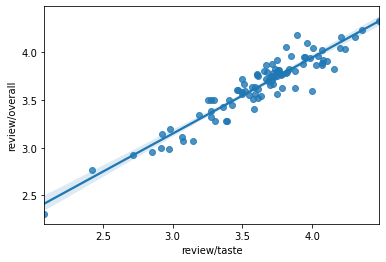

In [34]:
sns.regplot(x='review/taste', y='review/overall', data=beer_style)

In [93]:
dt.head()

,beer/ABV,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text
1,11.0,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...
2,4.7,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...
3,4.4,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...
4,4.4,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...
7,8.4,Frog's Hollow Double Pumpkin Ale,Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...


In [36]:
dt.corr()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix
index,1.000000,-0.244622,-0.332418,-0.464325,0.003771,-0.016999,0.017997,-0.014016,-0.006322,-0.185276
beer/ABV,-0.244622,1.000000,0.532006,0.094871,0.285753,0.386923,0.176668,0.355744,0.351733,0.290253
beer/beerId,-0.332418,0.532006,1.000000,0.468445,0.071318,0.166063,0.055059,0.133148,0.136479,0.376021
beer/brewerId,-0.464325,0.094871,0.468445,1.000000,-0.009553,0.003328,-0.021416,0.013857,-0.010546,0.154414
review/appearance,0.003771,0.285753,0.071318,-0.009553,1.000000,0.498585,0.455609,0.518740,0.489962,0.077947
review/aroma,-0.016999,0.386923,0.166063,0.003328,0.498585,1.000000,0.571082,0.571617,0.679555,0.137750
review/overall,0.017997,0.176668,0.055059,-0.021416,0.455609,0.571082,1.000000,0.664469,0.755370,0.087605
review/palate,-0.014016,0.355744,0.133148,0.013857,0.518740,0.571617,0.664469,1.000000,0.705284,0.118029
review/taste,-0.006322,0.351733,0.136479,-0.010546,0.489962,0.679555,0.755370,0.705284,1.000000,0.124818
review/timeUnix,-0.185276,0.290253,0.376021,0.154414,0.077947,0.137750,0.087605,0.118029,0.124818,1.000000


In [37]:
dt.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/profileName'],
      dtype='object')

In [38]:
dt=dt.drop(['index','beer/beerId','beer/brewerId','review/timeUnix','review/timeStruct','user/profileName'], axis=1)

In [40]:
new=dt['review/text'].tolist()

In [42]:
import re
import nltk

In [43]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')
pr=PorterStemmer()
corpus=[]
for i in range(len(new)):
    review=re.sub("[^a-zA-Z]", " ", new[i])
    review=review.lower()
    review=review.split()
    review=(pr.stem(words) for words in review if not words in stopwords.words('english'))
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Here above we have removed everything except words then converted it into lower case for all, then used stop words to remove unnecessary words(like: The, for etc)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=10)
K=cv.fit_transform(corpus).toarray()
K.shape

(29062, 10)

In [53]:
K2=pd.DataFrame(data=K)

In [54]:
K2

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.640436,0.140824,0.423100,0.459393,0.000000,0.000000,0.000000,0.424211,0.000000
1,0.369461,0.000000,0.288113,0.432811,0.469937,0.408311,0.453437,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.672905,0.000000,0.000000,0.514383,0.000000,0.531610
3,0.000000,0.000000,0.525310,0.000000,0.000000,0.372232,0.000000,0.654974,0.395603,0.000000
4,0.152079,0.000000,0.118594,0.178155,0.000000,0.168071,0.933228,0.000000,0.178623,0.000000
...,...,...,...,...,...,...,...,...,...,...
29057,0.276937,0.327379,0.215961,0.000000,0.000000,0.000000,0.000000,0.269267,0.000000,0.834856
29058,0.555992,0.328632,0.433574,0.325663,0.000000,0.307228,0.341183,0.000000,0.000000,0.279350
29059,0.420265,0.248407,0.000000,0.246163,0.000000,0.000000,0.257894,0.204313,0.740428,0.211156
29060,0.742358,0.219394,0.144726,0.000000,0.472122,0.205105,0.000000,0.180450,0.217982,0.186493


In [58]:
dt2=pd.get_dummies(dt,columns=['beer/style'], prefix=['beer/style'])
dt2

,beer/ABV,beer/name,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,beer/style_Altbier,beer/style_American Adjunct Lager,...,beer/style_Old Ale,beer/style_Pumpkin Ale,beer/style_Quadrupel (Quad),beer/style_Rauchbier,beer/style_Russian Imperial Stout,beer/style_Rye Beer,beer/style_Scotch Ale / Wee Heavy,beer/style_Tripel,beer/style_Wheatwine,beer/style_Winter Warmer
1,11.00,Bearded Pat's Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.70,Naughty Nellie's Ale,3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.40,Pilsner Urquell,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.40,Black Sheep Ale (Special),4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8.40,Frog's Hollow Double Pumpkin Ale,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37493,11.20,Founders KBS (Kentucky Breakfast Stout),4.0,2.0,2.5,1.0,2.0,Tried a 2011 bottle on May 15 with two of my f...,0,0,...,0,0,0,0,0,0,0,0,0,0
37496,8.50,Founders Dirty Bastard,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,0,0,...,0,0,0,0,0,0,1,0,0,0
37497,4.75,Stoudt's Fest,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,0,0,...,0,0,0,0,0,0,0,0,0,0
37498,11.20,Founders KBS (Kentucky Breakfast Stout),4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
dt3=pd.get_dummies(dt2,columns=['beer/name'], prefix=['beer/name'])
dt3

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,beer/style_Altbier,beer/style_American Adjunct Lager,beer/style_American Amber / Red Ale,...,beer/name_Sue,beer/name_Terminal Gravity IPA,beer/name_Wee Beast (Cuillin Beast),beer/name_Weltenburger Hefe-Weissbier Hell,beer/name_Weltenburger Kloster Asam-Bock,beer/name_Weltenburger Kloster Barock Dunkel,beer/name_Weltenburger Kloster Winter-Traum,beer/name_Weltenburger Pils,beer/name_Wheach,beer/name_Wild Frog Wheat Ale
1,11.00,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.70,3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.40,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.40,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8.40,4.0,4.0,4.0,4.0,4.0,One of the better pumpkin ales I've tried so f...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37493,11.20,4.0,2.0,2.5,1.0,2.0,Tried a 2011 bottle on May 15 with two of my f...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37496,8.50,4.5,4.0,3.5,4.5,4.5,A - A bright red with a maroon-amber hue; mini...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37497,4.75,4.0,3.5,4.0,4.5,4.0,Sampled on tap at Redbones.\t\tThis marzen sty...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37498,11.20,4.0,4.0,4.0,5.0,5.0,Pours a black body with a brown head that very...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
dt3=dt3.reset_index()

In [81]:
df = pd.concat([dt3, K2.reindex(dt3.index)], axis=1, sort=False)
df=df.reset_index()

In [82]:
df=df.drop(columns=['review/text'], axis=1)
df=df
df.head()

,level_0,index,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,beer/style_Altbier,beer/style_American Adjunct Lager,...,0,1,2,3,4,5,6,7,8,9
0,0,1,11.0,4.0,3.5,3.5,3.5,3.0,0,0,...,0.000000,0.640436,0.140824,0.423100,0.459393,0.000000,0.000000,0.000000,0.424211,0.00000
1,1,2,4.7,3.5,4.0,3.5,3.5,3.5,0,0,...,0.369461,0.000000,0.288113,0.432811,0.469937,0.408311,0.453437,0.000000,0.000000,0.00000
2,2,3,4.4,3.0,3.0,2.5,3.0,3.0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.672905,0.000000,0.000000,0.514383,0.000000,0.53161
3,3,4,4.4,4.0,3.0,3.0,3.5,2.5,0,0,...,0.000000,0.000000,0.525310,0.000000,0.000000,0.372232,0.000000,0.654974,0.395603,0.00000
4,4,7,8.4,4.0,4.0,4.0,4.0,4.0,0,0,...,0.152079,0.000000,0.118594,0.178155,0.000000,0.168071,0.933228,0.000000,0.178623,0.00000


In [85]:
X=df.drop(columns=['review/overall'])
y=df['review/overall']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,  random_state=0)

## Model Selection

In [87]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
pred=classifier.predict(X_test)
pred=np.around(pred,decimals = 1)

## Model Validation metrics

In [89]:
from sklearn import metrics

In [90]:
print(metrics.mean_absolute_error(y_test, pred))

0.3120591606635266


In [91]:
print(metrics.mean_squared_error(y_test, pred))

0.17109582056386077


In [92]:
from math import sqrt
print(sqrt(metrics.mean_squared_error(y_test, pred)))

0.41363730557562234
